In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


Imports necessary packages

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

we import the h5py file and initialize

In [4]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

with h5py.File('/home/jovyan/Data/FOF_Subfind/IllustrisTNG//LH/LH_0/fof_subhalo_tab_013.hdf5', 'r') as hf:
    print (hf['Subhalo'].keys())
    mass = hf['Subhalo/SubhaloMass'][:]
    vmax = hf['Subhalo/SubhaloVmax'][:]
    stype = hf['Subhalo/SubhaloMassType'][:]

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [5]:
(stype[:,4] == 0) & (stype[:,5] == 0)

array([False, False, False, ...,  True,  True,  True])

In [6]:
False | False

False

In [7]:
np.sum(stype[:,5] != 0)

1178

In [8]:
#https://www.tng-project.org/data/docs/specifications/

In [9]:
pdstype = pd.DataFrame(mass, columns=['SubhaloMassType'])

In [10]:
pdstype

,SubhaloMassType
0,970.334351
1,792.490295
2,249.181976
3,83.498718
4,35.225681
...,...
20911,0.141135
20912,0.181459
20913,0.174738
20914,0.147855


In [11]:
mass

array([9.7033435e+02, 7.9249030e+02, 2.4918198e+02, ..., 1.7473826e-01,
       1.4785546e-01, 1.6129686e-01], dtype=float32)

In [12]:
vmax

array([484.90527 , 582.1587  , 351.3055  , ...,  29.441542,  21.061779,
        21.790277], dtype=float32)

converting them in pandas framework

In [13]:
pdmass = pd.DataFrame(mass, columns=['SubhaloMass'])
lpdmass = np.log10(pdmass*(10**10))

In [14]:
pdmass

,SubhaloMass
0,970.334351
1,792.490295
2,249.181976
3,83.498718
4,35.225681
...,...
20911,0.141135
20912,0.181459
20913,0.174738
20914,0.147855


In [15]:
pdvmax = pd.DataFrame(vmax, columns=['SubhaloVmax'])
lpdvmax = np.log10(pdvmax)

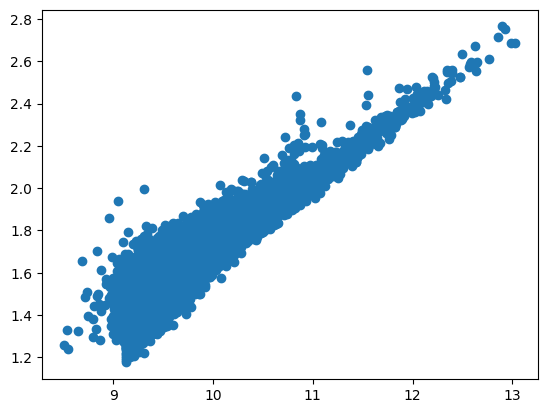

In [69]:
plt.scatter(lpdmass, lpdvmax)

Case 1: 
Feature - Vmax, Target - Mass, Model - Decision Tree Regressor

In [17]:
X_train, X_test, y_train, y_test = train_test_split(lpdvmax, lpdmass, test_size = 0.05)

In [18]:
vmax.shape

(20916,)

In [19]:
mass.shape

(20916,)

In [20]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
y_pred

array([10.33430375,  9.35889358,  9.25877843, ...,  9.30679868,
        9.54622036,  9.68998005])

In [23]:
np.mean(pdmass)

SubhaloMass    1.93928
dtype: float32

In [24]:
y_train.shape

(19870, 1)

In [25]:
np.mean(y_pred)

9.673131870191714

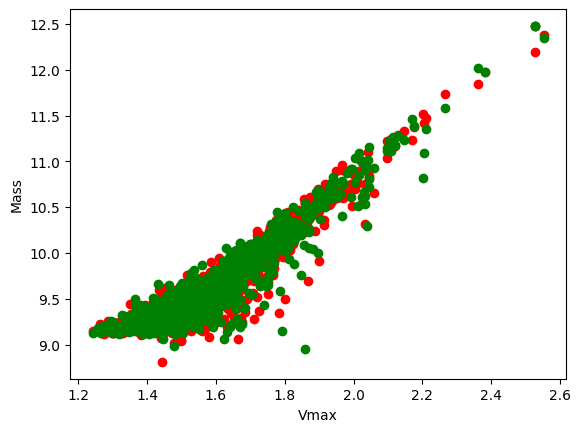

In [26]:
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='green')
plt.xlabel('Vmax')
plt.ylabel('Mass')

plt.show()

Case 2: same as 1, just I tried working with the h5py datas instead of coverting it into the pandas data framework

In [27]:
x_train, x_test, Y_train, Y_test = train_test_split(vmax, mass, test_size = 0.05)

In [28]:
vregressor = DecisionTreeRegressor()
vregressor.fit(x_train.reshape(-1,1), Y_train.reshape(-1,1))

DecisionTreeRegressor()

In [29]:
vy_pred = vregressor.predict(x_test.reshape(-1,1))

In [30]:
np.mean(mass)

1.9392798

In [31]:
np.mean(vy_pred)

1.819028904358812

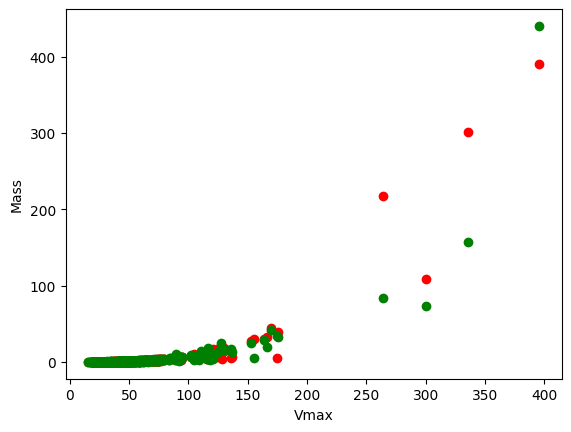

In [32]:
plt.scatter(x_test, Y_test, color='red')
plt.scatter(x_test, vy_pred, color='green')
plt.xlabel('Vmax')
plt.ylabel('Mass')
plt.show()

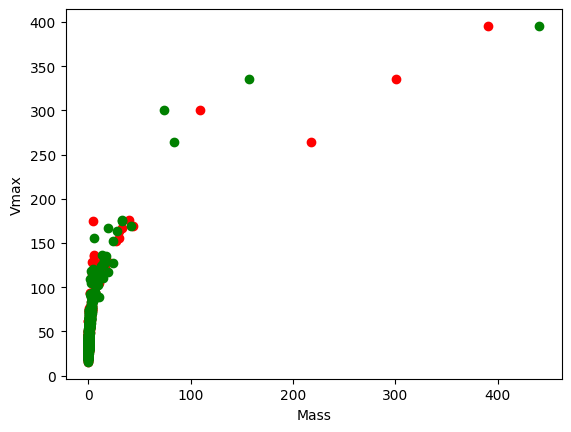

In [33]:
plt.scatter(Y_test, x_test, color='red')
plt.scatter(vy_pred, x_test, color='green')
plt.xlabel('Mass')
plt.ylabel('Vmax')
plt.show()

Case 3: We are now using datas from IllustrisTNG DM, and perform the same set with the same model

In [34]:
with h5py.File('/home/jovyan/Data/FOF_Subfind/IllustrisTNG_DM/LH/LH_0/fof_subhalo_tab_013.hdf5', 'r') as hfdm:
    print (hfdm['Subhalo'].keys())
    massdm = hfdm['Subhalo/SubhaloMass'][:]
    vmaxdm = hfdm['Subhalo/SubhaloVmax'][:]

<KeysViewHDF5 ['SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSpin', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad']>


In [35]:
pdmassdm = pd.DataFrame(massdm, columns=['SubhaloMass'])
pdvmaxdm = pd.DataFrame(vmaxdm, columns=['SubhaloVmax'])

In [36]:
dmx_train, dmx_test, dmy_train, dmy_test = train_test_split(pdvmaxdm, pdmassdm, test_size = 0.05)
dmregressor = DecisionTreeRegressor()
dmregressor.fit(dmx_train, dmy_train)
dmy_pred = dmregressor.predict(dmx_test)

In [37]:
np.mean(massdm)

2.3086483

In [38]:
np.mean(dmy_pred)

2.0895773257936967

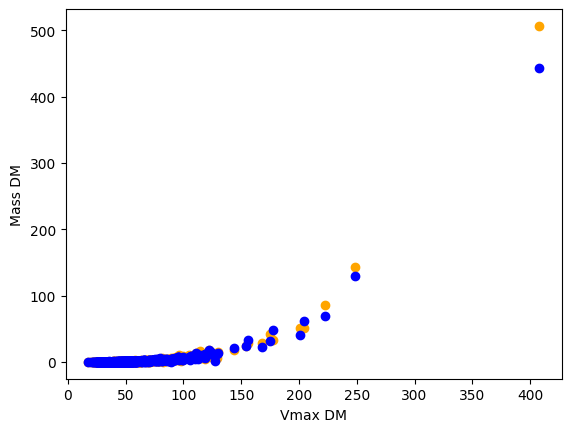

In [39]:
plt.scatter(dmx_test, dmy_test, color='orange')
plt.scatter(dmx_test, dmy_pred, color='blue')
plt.xlabel('Vmax DM')
plt.ylabel('Mass DM')

plt.show()

Tried comparing with our case 1

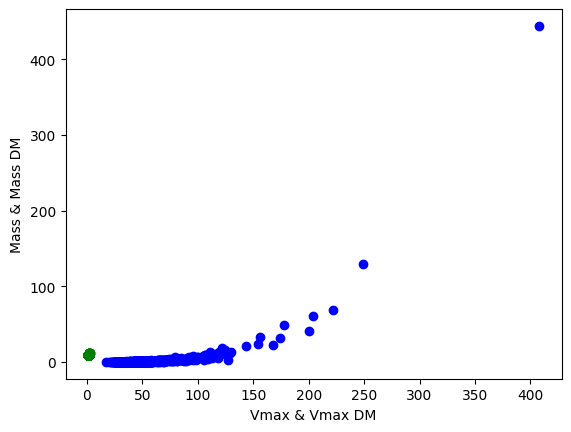

In [40]:
plt.scatter(X_test, y_pred, color='green')
plt.scatter(dmx_test, dmy_pred, color='blue')
plt.xlabel('Vmax & Vmax DM')
plt.ylabel('Mass & Mass DM')

plt.show()

Case 4: Now, trying with Linear Regression model, using the set from case 1

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
Linmodel = LinearRegression()
Linmodel.fit(X_train, y_train)
liny_pred = Linmodel.predict(X_test)

In [42]:
np.mean(liny_pred)

9.676072

Finding mse for case 1,3,4

In [43]:
mse = mean_squared_error(y_test, y_pred)
dmmse = mean_squared_error(dmy_test, dmy_pred)
linmse = mean_squared_error(y_test, liny_pred)

In [44]:
mse, dmmse, linmse

(0.04444293852479335, 6.261437306142626, 0.027481993641975854)

Finding r2 scores for case 1,3,4

In [45]:
r2_score(y_test, y_pred)

0.813257025188424

In [46]:
r2_score(dmy_test, dmy_pred)

0.9801520169887795

In [47]:
r2_score(y_test, liny_pred)

0.8845245292771907

Case 5: Trying with Random Forest Regressor model, using the same set as case 1

In [48]:
foregressor = RandomForestRegressor()
foregressor.fit(X_train, y_train)
foregressor.get_params()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
foy_pred = foregressor.predict(X_test)

In [50]:
foy_pred

array([10.25217712,  9.33126274,  9.26586008, ...,  9.32344698,
        9.53990741,  9.64622008])

In [51]:
r2_score(y_test, foy_pred)

0.8652323584535422

In [52]:
np.mean(foy_pred)

9.67284935705337

In [53]:
np.mean(pdmass)

SubhaloMass    1.93928
dtype: float32

In [54]:
mseee = mean_squared_error(y_test, foy_pred)
mae = mean_absolute_error(y_test, foy_pred)

In [55]:
mseee

0.03207333509827612

In [56]:
mae

0.13097508225715132

Trying to cross validate to evaluate the model's performance, reliability and avoid overfitting

it is for case 5

In [57]:
foscores = cross_validate(foregressor,pdvmax,pdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: Dat

{'fit_time': array([3.17865801, 3.17121816, 3.19347072, 3.23450398, 3.23332119]), 'score_time': array([0.19124055, 0.16515779, 0.16878629, 0.16018319, 0.16747427]), 'test_score': array([0.65570529, 0.97621844, 0.90510221, 0.89021562, 0.92042985]), 'train_score': array([0.98717739, 0.97838188, 0.98270974, 0.98041559, 0.98379286])}
0.8695342809690121
0.9824954884868881


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044:

[12.90965406 12.91719854 12.42995639 ...  9.38378887  9.3715721
  9.21488504]


Text(0, 0.5, 'Predicted Mass by random forest')

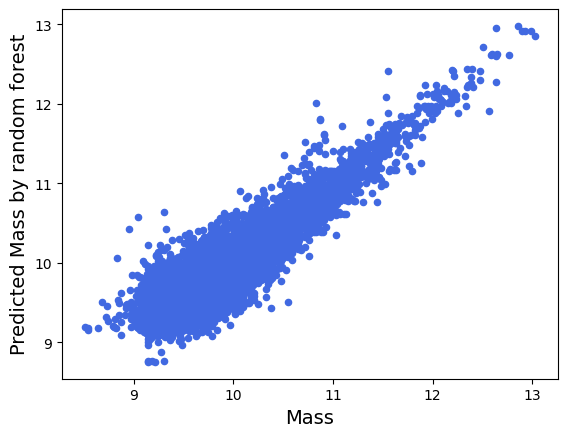

In [68]:
print (foscores)
print (np.mean(foscores['test_score']))
print (np.mean(foscores['train_score']))
focvpred = cross_val_predict(foregressor, lpdvmax, lpdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print (focvpred)

plt.scatter(lpdmass,focvpred, s = 20, c = 'royalblue')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Mass by random forest',fontsize=14)

now cross validate for case 1,3,4

The Score :  {'fit_time': array([0.05601788, 0.0549736 , 0.05449009, 0.05479193, 0.05555677]), 'score_time': array([0.00597262, 0.00577784, 0.00545144, 0.00545406, 0.00589991]), 'test_score': array([0.57880428, 0.97206358, 0.83683148, 0.9335406 , 0.88230837]), 'train_score': array([0.99999995, 0.99999998, 0.99999995, 0.99999993, 0.99999992])}
Test Score :  0.8407096621808675
Train Score :  0.9999999461071821
Cross Vaidate prediction :  [13.03056434 12.92732791 12.37983644 ...  9.41117523  9.46967139
  9.22535469]


Text(0, 0.5, 'Predicted Mass by decision trees')

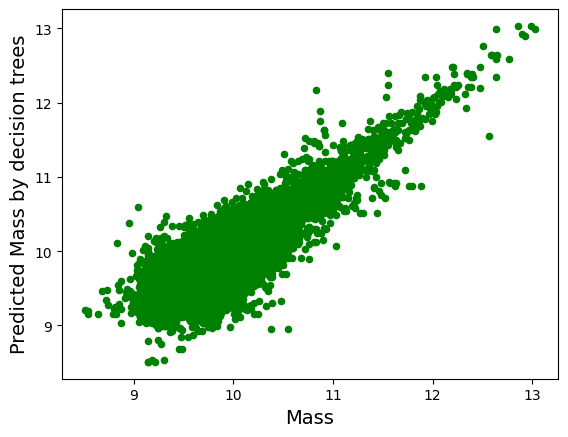

In [64]:
scores = cross_validate(regressor,pdvmax,pdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
print ("The Score : ", scores)
print ("Test Score : ", np.mean(scores['test_score']))
print ("Train Score : ", np.mean(scores['train_score']))

cvpred = cross_val_predict(regressor, lpdvmax, lpdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", cvpred)

plt.scatter(lpdmass,cvpred, s = 20, c = 'green')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Mass by decision trees',fontsize=14)

#mn = len(np.where(np.abs(pdmass-cvpred)>0.15*(1+pdmass))[i]) / len(pdmass)
#print (mn)

{'fit_time': array([0.04612899, 0.04349613, 0.04452395, 0.04573321, 0.04389381]), 'score_time': array([0.00432539, 0.00393295, 0.00403762, 0.00412011, 0.0041163 ]), 'test_score': array([0.81263302, 0.89069249, 0.64656557, 0.68344678, 0.93969605]), 'train_score': array([0.99999995, 0.99999999, 0.99999999, 0.99999996, 0.99999997])}
0.7946067808999284
0.9999999687736816
[8.61174316e+02 1.05622412e+03 2.42462372e+02 ... 2.71568090e-01
 2.95529962e-01 3.43453735e-01]


Text(0, 0.5, 'Predicted Mass in DM by decision trees')

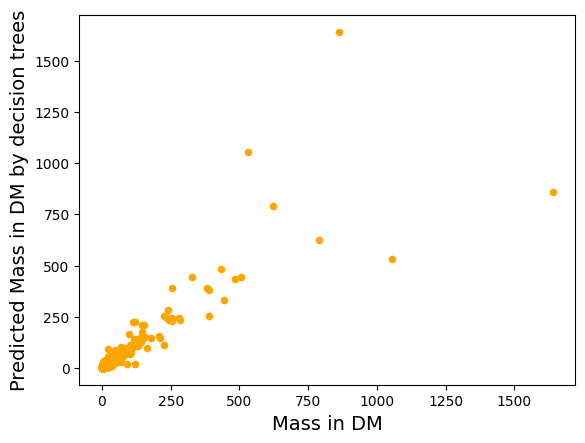

In [60]:
dmscores = cross_validate(dmregressor,pdvmaxdm,pdmassdm, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
print (dmscores)
print (np.mean(dmscores['test_score']))
print (np.mean(dmscores['train_score']))

dmcvpred = cross_val_predict(dmregressor,pdvmaxdm,pdmassdm, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print (dmcvpred)

plt.scatter(pdmassdm,dmcvpred, s = 20, c = 'orange')
plt.xlabel('Mass in DM', fontsize=14)
plt.ylabel('Predicted Mass in DM by decision trees',fontsize=14)

{'fit_time': array([0.00670099, 0.00496721, 0.00481319, 0.00532174, 0.0056479 ]), 'score_time': array([0.00326419, 0.00314116, 0.00319958, 0.00324416, 0.00361562]), 'test_score': array([0.47881389, 0.27537121, 0.45032813, 0.3050147 , 0.46334521]), 'train_score': array([0.38338793, 0.42126193, 0.37920804, 0.42414987, 0.37710903])}
0.39457462833241347
0.39702335966762775
[[12.327026]
 [12.518257]
 [11.983618]
 ...
 [ 9.361039]
 [ 9.005129]
 [ 9.040751]]


Text(0, 0.5, 'Predicted Mass by linear regression')

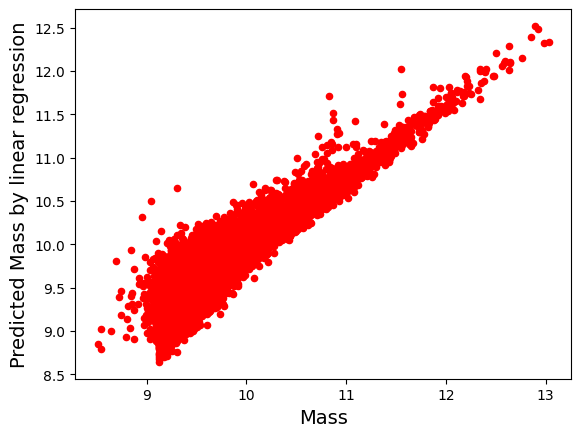

In [65]:
linscores = cross_validate(Linmodel, pdvmax,pdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
print (linscores)
print (np.mean(linscores['test_score']))
print (np.mean(linscores['train_score']))

lincvpred = cross_val_predict(Linmodel, lpdvmax, lpdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print (lincvpred)

plt.scatter(lpdmass,lincvpred, s = 20, c = 'red')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Mass by linear regression',fontsize=14)

Case 6: Now trying the whole thing with knn regressor model now

prediction :  [[10.14531646]
 [ 9.28419066]
 [ 9.29110734]
 ...
 [ 9.32979508]
 [ 9.5044518 ]
 [ 9.6480515 ]]
R2 Score :  0.8777894002447529
The mean square value :  0.029084886205121573
The Score :  {'fit_time': array([0.00916362, 0.0085361 , 0.00855589, 0.00854135, 0.01023769]), 'score_time': array([0.00978231, 0.00832725, 0.00869441, 0.00853539, 0.01265168]), 'test_score': array([0.86731304, 0.86031678, 0.86855315, 0.86850875, 0.86298936]), 'train_score': array([0.93303472, 0.93483363, 0.93249233, 0.93238944, 0.93335422])}
Test Score :  0.8655362152661912
Train Score :  0.9332208688996145
Cross Vaidate prediction :  [[12.83942134]
 [12.93835487]
 [12.45402885]
 ...
 [ 9.36809502]
 [ 9.31814913]
 [ 9.21881638]]


Text(0, 0.5, 'Predicted Mass by knn regressor')

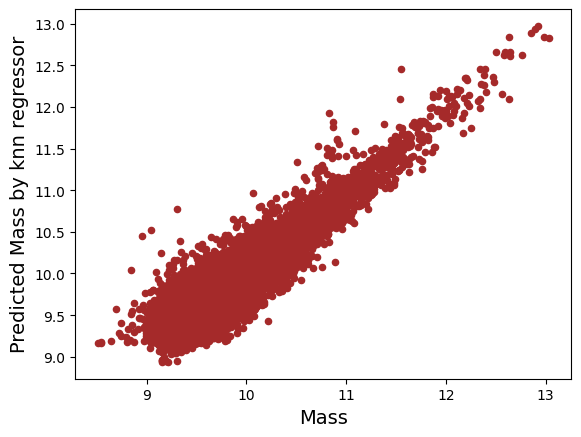

In [66]:
from sklearn.neighbors import KNeighborsRegressor
k = 3  
knnregressor = KNeighborsRegressor(n_neighbors=k)
knnregressor.fit(X_train, y_train)

knny_pred = knnregressor.predict(X_test)
print ("prediction : ", knny_pred)

knr = r2_score(y_test, knny_pred)
print ("R2 Score : ", knr)

knmse = mean_squared_error(y_test, knny_pred)
print ("The mean square value : ", knmse)

knscores = cross_validate(knnregressor, lpdvmax, lpdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
print ("The Score : ", knscores)
print ("Test Score : ", np.mean(knscores['test_score']))
print ("Train Score : ", np.mean(knscores['train_score']))

kncvpred = cross_val_predict(knnregressor, lpdvmax, lpdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", kncvpred)

plt.scatter(lpdmass,kncvpred, s = 20, c = 'brown')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Mass by knn regressor',fontsize=14)

#mn = len(np.where(np.abs(pdmass-cvpred)>0.15*(1+pdmass))[i]) / len(pdmass)
#print (mn)

Case 7: Now trying the whole thing again, with extra randomized model this time.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


prediction :  [10.29603883  9.35758824  9.32789597 ...  9.30551047  9.57390226
  9.50626238]
R2 Score :  0.8467345738796561
The mean square value :  0.03647562066479654


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: Dat

The Score :  {'fit_time': array([1.3030777 , 1.4060483 , 1.36257887, 1.38126421, 1.19303536]), 'score_time': array([0.17754483, 0.18061018, 0.17712808, 0.1797471 , 0.16329193]), 'test_score': array([0.83083583, 0.82279571, 0.82745243, 0.8271041 , 0.83463516]), 'train_score': array([0.9996407 , 0.99961091, 0.99966772, 0.99965276, 0.9995832 ])}
Test Score :  0.8285646463952723
Train Score :  0.9996310590223872


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044:

Cross Vaidate prediction :  [13.0225636  12.92732791 12.41035466 ...  9.37714694  9.3833037
  9.22500011]


Text(0, 0.5, 'Predicted Mass by Extra Randomized forest')

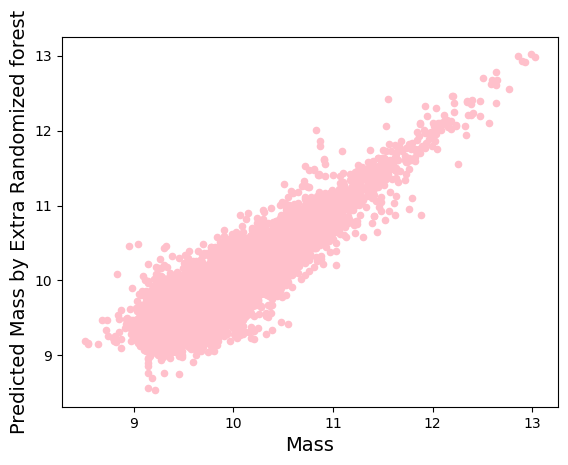

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
etregressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
etregressor.fit(X_train, y_train)

ety_pred = etregressor.predict(X_test)
print ("prediction : ", ety_pred)

etr = r2_score(y_test, ety_pred)
print ("R2 Score : ", etr)

etmse = mean_squared_error(y_test, ety_pred)
print ("The mean square value : ", etmse)

etscores = cross_validate(etregressor, lpdvmax, lpdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
print ("The Score : ", etscores)
print ("Test Score : ", np.mean(etscores['test_score']))
print ("Train Score : ", np.mean(etscores['train_score']))

etcvpred = cross_val_predict(etregressor, lpdvmax, lpdmass, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", etcvpred)

plt.scatter(lpdmass,etcvpred, s = 20, c = 'pink')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Mass by Extra Randomized forest',fontsize=14)